In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from copy import copy

In [52]:
data = load_breast_cancer(as_frame=True)

In [53]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
X = data["data"]
y = data["target"]

In [55]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
count = np.bincount(y)
print(f"Class benign: {count[0]} observations ({round(count[0]/count.sum()*100, 2)}%)")
print(f"Class malignant: {count[1]} observations ({round(count[1]/count.sum()*100, 2)}%)")

Class benign: 212 observations (37.26%)
Class malignant: 357 observations (62.74%)


In [57]:
def get_mean_result(result):
    out = {}
    out['accuracy'] = round(result['test_accuracy'].mean(), 4)
    out['recall'] = round(result['test_recall'].mean(), 4)
    out['precision'] = round(result['test_precision'].mean(), 4)
    return out

In [58]:
def get_scores(pred, true):
    out = {}
    out['accuracy'] = round(accuracy_score(pred, true), 4)
    out['recall'] = round(recall_score(pred, true), 4)
    out['precision'] = round(precision_score(pred, true), 4)
    return out

## 1 and 2

In [59]:
logreg = LogisticRegression(max_iter=10000)

In [60]:
cv_results = cross_validate(logreg, X, y, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [61]:
result = get_mean_result(cv_results)

In [62]:
print(result)

{'accuracy': 0.9508, 'recall': 0.9692, 'precision': 0.9543}


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

In [65]:
get_scores(pred, y_test)

{'accuracy': 0.9561, 'recall': 0.9459, 'precision': 0.9859}

In [66]:
confusion_matrix(pred, y_test)

array([[39,  1],
       [ 4, 70]])

## Reducing

In [67]:
print(f"New samples: {count.sum()//10}")

New samples: 56


In [68]:
df = copy(X)
df["diagnosis"] = copy(y)

In [69]:
malignant_df = df[df["diagnosis"] == 1]  # Subset of malignant observations
benign_df = df[df["diagnosis"] == 0]  # Subset of benign observations

In [70]:
samples = int(round(0.1 * benign_df.shape[0] / 0.9))
print(f"New samples: {samples}")

New samples: 24


In [71]:
reduced_malignant_df = resample(malignant_df, n_samples=samples, random_state=111)
reduced_data = pd.concat([benign_df, reduced_malignant_df])

In [72]:
reduced_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [73]:
X_reduced = reduced_data.iloc[:, :-1]  # Features
y_reduced = reduced_data["diagnosis"]  # Target variable

In [74]:
X_reduced.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
count_reduced = np.bincount(y_reduced)
print(f"Class benign: {count_reduced[0]} observations ({round(count_reduced[0]/count_reduced.sum()*100, 2)}%)")
print(f"Class malignant: {count_reduced[1]} observations ({round(count_reduced[1]/count_reduced.sum()*100, 2)}%)")

Class benign: 212 observations (89.83%)
Class malignant: 24 observations (10.17%)


In [76]:
logreg_reduced = LogisticRegression(max_iter=10000)

In [77]:
cv_results_reduced = cross_validate(logreg_reduced, X_reduced, y_reduced, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [78]:
result_reduced = get_mean_result(cv_results_reduced)

In [79]:
print(result_reduced)

{'accuracy': 0.9617, 'recall': 0.79, 'precision': 0.8629}


In [80]:
# X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

In [81]:
# logreg_reduced.fit(X_reduced_train, y_reduced_train)
# pred_reduced = logreg_reduced.predict(X_reduced_test)

In [82]:
# scores_reduced = get_scores(pred_reduced, y_reduced_test)

In [83]:
# print(scores_reduced)

In [84]:
# confusion_matrix(pred_reduced, y_reduced_test)

## Undersampling

#### Original

In [85]:
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [86]:
count_undersampled = np.bincount(y_undersampled)
print(f"Class benign: {count_undersampled[0]} observations ({round(count_undersampled[0]/count_undersampled.sum()*100, 2)}%)")
print(f"Class malignant: {count_undersampled[1]} observations ({round(count_undersampled[1]/count_undersampled.sum()*100, 2)}%)")

Class benign: 212 observations (50.0%)
Class malignant: 212 observations (50.0%)


In [87]:
logreg_undersampled = LogisticRegression(max_iter=10000)


In [88]:
cv_results_undersampled = cross_validate(logreg_undersampled, X_undersampled, y_undersampled, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [89]:
result_undersampled = get_mean_result(cv_results_undersampled)

In [90]:
print(result_undersampled)

{'accuracy': 0.9435, 'recall': 0.9575, 'precision': 0.9335}


#### Reduced

In [91]:
undersampler = RandomUnderSampler(random_state=42)
X_undersampled_reduced, y_undersampled_reduced = undersampler.fit_resample(X_reduced, y_reduced)

In [92]:
count_undersampled = np.bincount(y_undersampled_reduced)
print(f"Class benign: {count_undersampled[0]} observations ({round(count_undersampled[0]/count_undersampled.sum()*100, 2)}%)")
print(f"Class malignant: {count_undersampled[1]} observations ({round(count_undersampled[1]/count_undersampled.sum()*100, 2)}%)")

Class benign: 24 observations (50.0%)
Class malignant: 24 observations (50.0%)


In [93]:
logreg_undersampled_reduced = LogisticRegression(max_iter=10000)


In [94]:
cv_results_undersampled_reduced = cross_validate(logreg_undersampled_reduced, X_undersampled_reduced, y_undersampled_reduced, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [95]:
result_undersampled_reduced = get_mean_result(cv_results_undersampled_reduced)

In [96]:
print(result_undersampled_reduced)

{'accuracy': 0.9178, 'recall': 0.92, 'precision': 0.9267}


## Oversampling

#### Original

In [97]:
oversampler = SMOTE(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [98]:
count_oversampled = np.bincount(y_oversampled)
print(f"Class benign: {count_oversampled[0]} observations ({round(count_oversampled[0]/count_oversampled.sum()*100, 2)}%)")
print(f"Class malignant: {count_oversampled[1]} observations ({round(count_oversampled[1]/count_oversampled.sum()*100, 2)}%)")

Class benign: 357 observations (50.0%)
Class malignant: 357 observations (50.0%)


In [99]:
logreg_oversampled = LogisticRegression(max_iter=10000)

In [100]:
cv_results_oversampled = cross_validate(logreg_oversampled, X_oversampled, y_oversampled, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [101]:
result_oversampled = get_mean_result(cv_results_oversampled)

In [102]:
print(result_oversampled)

{'accuracy': 0.9538, 'recall': 0.9552, 'precision': 0.9528}


#### Reduced

In [103]:
oversampler = SMOTE(random_state=42)
X_oversampled_reduced, y_oversampled_reduced = oversampler.fit_resample(X_reduced, y_reduced)

In [104]:
count_oversampled = np.bincount(y_oversampled_reduced)
print(f"Class benign: {count_oversampled[0]} observations ({round(count_oversampled[0]/count_oversampled.sum()*100, 2)}%)")
print(f"Class malignant: {count_oversampled[1]} observations ({round(count_oversampled[1]/count_oversampled.sum()*100, 2)}%)")

Class benign: 212 observations (50.0%)
Class malignant: 212 observations (50.0%)


In [105]:
logreg_oversampled_reduced = LogisticRegression(max_iter=10000)

In [106]:
cv_results_oversampled_reduced = cross_validate(logreg_oversampled_reduced, X_oversampled_reduced, y_oversampled_reduced, cv=5, scoring=('accuracy', 'recall', 'precision'))

In [107]:
result_oversampled_reduced = get_mean_result(cv_results_oversampled_reduced)

In [108]:
print(result_oversampled_reduced)

{'accuracy': 0.9835, 'recall': 0.9857, 'precision': 0.982}


## Cost weight

#### Original

In [109]:
weights = [(i+3)/2 for i in range(20)]
print(weights)

[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]


In [110]:
cost_scores = {}
for w in weights:
    logreg_cost = LogisticRegression(max_iter=10000, class_weight={0: 1, 1: w})
    cv_results_cost = cross_validate(logreg_cost, X, y, cv=5, scoring=('accuracy', 'recall', 'precision'))
    result_cost = get_mean_result(cv_results_cost)
    print(f"Weight {w}:")
    print(result_cost)
    cost_scores[str(w)] = result_cost

Weight 1.5:
{'accuracy': 0.9473, 'recall': 0.9748, 'precision': 0.944}
Weight 2.0:
{'accuracy': 0.9473, 'recall': 0.9748, 'precision': 0.944}
Weight 2.5:
{'accuracy': 0.9456, 'recall': 0.9776, 'precision': 0.939}
Weight 3.0:
{'accuracy': 0.9473, 'recall': 0.9832, 'precision': 0.9369}
Weight 3.5:
{'accuracy': 0.9473, 'recall': 0.986, 'precision': 0.9347}
Weight 4.0:
{'accuracy': 0.9473, 'recall': 0.986, 'precision': 0.9343}
Weight 4.5:
{'accuracy': 0.9438, 'recall': 0.9888, 'precision': 0.9274}
Weight 5.0:
{'accuracy': 0.9438, 'recall': 0.9888, 'precision': 0.9274}
Weight 5.5:
{'accuracy': 0.9438, 'recall': 0.9916, 'precision': 0.9253}
Weight 6.0:
{'accuracy': 0.9456, 'recall': 0.9944, 'precision': 0.9255}
Weight 6.5:
{'accuracy': 0.9438, 'recall': 0.9944, 'precision': 0.9231}
Weight 7.0:
{'accuracy': 0.9438, 'recall': 0.9916, 'precision': 0.9254}
Weight 7.5:
{'accuracy': 0.9473, 'recall': 0.9972, 'precision': 0.9257}
Weight 8.0:
{'accuracy': 0.9491, 'recall': 0.9972, 'precision': 0.927

#### Reduced

In [111]:
cost_scores_reduced = {}
for w in weights:
    logreg_cost = LogisticRegression(max_iter=10000, class_weight={0: 1, 1: w})
    cv_results_cost = cross_validate(logreg_cost, X_reduced, y_reduced, cv=5, scoring=('accuracy', 'recall', 'precision'))
    result_cost = get_mean_result(cv_results_cost)
    print(f"Weight {w}:")
    print(result_cost)
    cost_scores_reduced[str(w)] = result_cost

Weight 1.5:
{'accuracy': 0.9618, 'recall': 0.84, 'precision': 0.8429}
Weight 2.0:
{'accuracy': 0.9618, 'recall': 0.84, 'precision': 0.8429}
Weight 2.5:
{'accuracy': 0.9618, 'recall': 0.84, 'precision': 0.8429}
Weight 3.0:
{'accuracy': 0.966, 'recall': 0.88, 'precision': 0.8429}
Weight 3.5:
{'accuracy': 0.966, 'recall': 0.88, 'precision': 0.8429}
Weight 4.0:
{'accuracy': 0.966, 'recall': 0.88, 'precision': 0.8429}
Weight 4.5:
{'accuracy': 0.9618, 'recall': 0.88, 'precision': 0.825}
Weight 5.0:
{'accuracy': 0.9618, 'recall': 0.88, 'precision': 0.825}
Weight 5.5:
{'accuracy': 0.9618, 'recall': 0.88, 'precision': 0.825}
Weight 6.0:
{'accuracy': 0.9618, 'recall': 0.88, 'precision': 0.825}
Weight 6.5:
{'accuracy': 0.9618, 'recall': 0.88, 'precision': 0.825}
Weight 7.0:
{'accuracy': 0.966, 'recall': 0.92, 'precision': 0.825}
Weight 7.5:
{'accuracy': 0.966, 'recall': 0.92, 'precision': 0.825}
Weight 8.0:
{'accuracy': 0.966, 'recall': 0.92, 'precision': 0.825}
Weight 8.5:
{'accuracy': 0.966, 'r

## Plot

In [125]:
tmp = {
    'original': result,
    'reduced': result_reduced,
    'undersampling': result_undersampled,
    'undersampling_reduced': result_undersampled_reduced,
    'oversampling': result_oversampled,
    'oversampling_reduced': result_oversampled_reduced,
    'cost_aware': cost_scores['8.0'],
    'cost_aware_reduced': cost_scores_reduced['7.0'],
}

In [126]:
method = []
metric = []
value = []

In [127]:
for k, v in tmp.items():
    for m in ['accuracy', 'recall', 'precision']:
        method.append(k)
        metric.append(m)
        value.append(tmp[k][m])

df_dict = {
    'method': method,
    'metric': metric,
    'value': value,
}

In [128]:
df = pd.DataFrame.from_dict(df_dict)

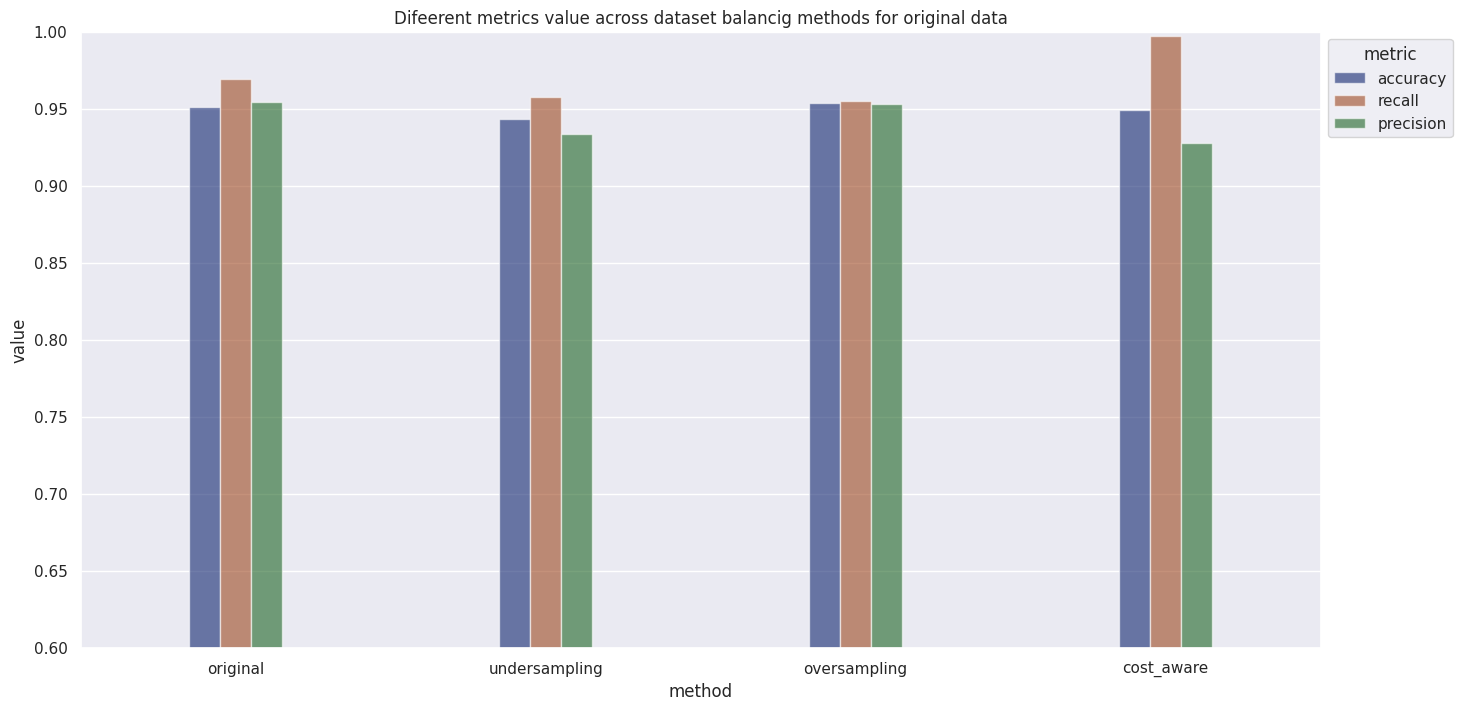

In [131]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8)})

df_original = df.loc[df['method'].isin(['original', 'undersampling', 'oversampling', 'cost_aware'])]

g = sns.barplot(
    data=df_original,
    x="method", y="value", hue="metric",
    palette="dark", alpha=.6, width=0.3
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(ylim=(0.6, 1))
g.set_title('Difeerent metrics value across dataset balancig methods for original data')
plt.show()

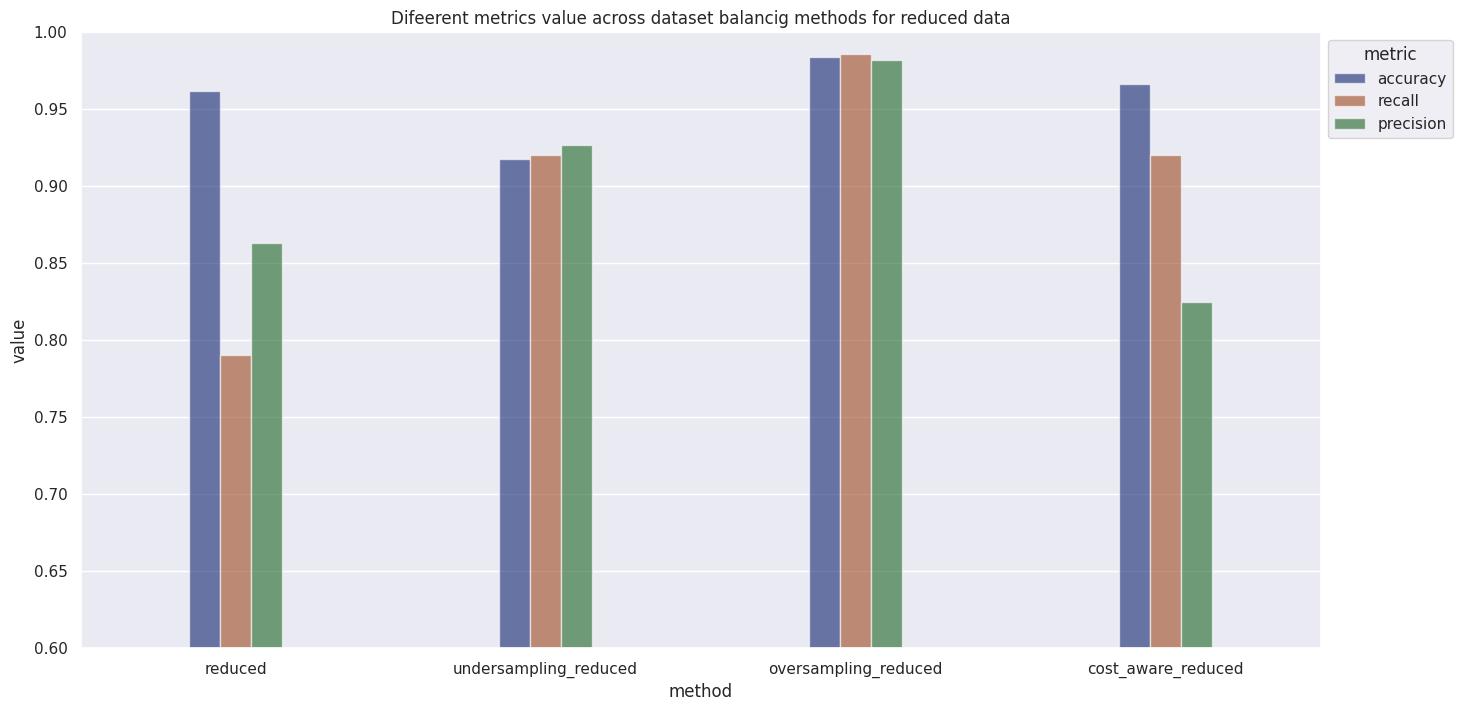

In [133]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8)})

df_reduced = df.loc[df['method'].isin(['reduced', 'undersampling_reduced', 'oversampling_reduced', 'cost_aware_reduced'])]

g = sns.barplot(
    data=df_reduced,
    x="method", y="value", hue="metric",
    palette="dark", alpha=.6, width=0.3
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(ylim=(0.6, 1))
g.set_title('Difeerent metrics value across dataset balancig methods for reduced data')
plt.show()